# Chiebuka Onwuzurike MSBA '21

# Main Deliverables:

- Complete Steps listed below.
- Attach your Notebook (Use the name "Assignment #3 - YOUR NAME.ipynb" and your CSV file with "assign3.csv") in the Attachments part of this assignment submission.
- Attach a PDF file (Use the name ""Assignment #3 - YOUR NAME.pdf") that include ALL of the text boxes and executed python code output from your Colab notebook in the Attachments part of this assignment submission.

# Goals:

Prepare your baseline data for the BA870 Individual Project.
Learn how to download and compute monthly stock returns.
Merge Compustat data with CRSP data.
Estimate simple regressions that attempt to explain long-window stock returns during the year 2020.
Provide a report of your completed assignment and analysis using “Markdown” text boxes in Colab Notebook
Share a Colab Notebook using shareable weblink.
Print a completed and executed Colab Notebook and submit in PDF format.


# Final Submission:
Go to the Assignments Tab on QuestromTools
Click on Assignment #3
Read this document
Make sure you put your name in a text box (Markdown) at the top of your  Notebook "Assignment #3 - YOUR NAME.ipynb"
Attach your Notebook (Use the name "Assignment #3 - YOUR NAME.ipynb" and your CSV file with "assign3.csv").
Attach a PDF file (Use the name ""Assignment #3 - YOUR NAME.pdf") that include ALL of the text boxes and executed python code output from your Colab notebook.
Insert the shared link to your completed Colab Notebook on your Google Drive in the text box below.

## Due: Submit to Assignments Tab (Assignment #3) by Thursday, June 24 at 11:00pm (Boston Time)


# Steps:

## (1) Read the following article about the P/E ratio:

https://www.nerdwallet.com/article/investing/pe-ratio-definition

## (2) Attached to this assignment is a text file:

"BA870project.txt" contains a the tickers 2,877 U.S. companies that you will analyze for Assignment #3 and for your BA870 Individual Project.

## (3) Go to WRDS and download the monthly stock returns for the 12 months in the year 2020 for the list of stocks in "BA870project.txt".

Note: You should view a tutorial video titled "Assignment #3 - Tutorial A" to get instructions on how to download the WRDS CRSP data. This video will be posted in the Media Gallery on QuestromTools at 12:00pm on Friday, June 18.

## (4) For each ticker, calculate the 2 stock return variables based on the data from step (3):

### (a) RetEarly2020 = 3-month stock return from January to March 2020

RetEarly2020 = {(1+Ret[Jan 2020])*(1+Ret[Feb 2020])*(1+Ret[Mar 2020])} - 1

### (b) RetLate2020 = 9-month stock return from April  to December 2020

RetLate2020 = {(1+Ret[Apr 2020])*(1+Ret[May 2020])*(1+Ret[Jun 2020])*(1+Ret[Jul 2020])*(1+Ret[JAug 2020])*
                          (1+Ret[JSep 2020])*(1+Ret[Oct 2020])*(1+Ret[Nov 2020])*(1+Ret[Dec 2020])} - 1

Save your data in a CSV file called "temp1.csv" with 3 columns:

TICKER, RetEarly2020, RetLate2020

Note: You can calculate the values for RetEarly2020 and RetLate2020 using an Excel formula or you can program it in Python.

### (5) Using the file "BA870project.txt", download the following variables for "Fiscal Year" 2019 from WRDS Compustat:

- TIC
- SALE -- Sales/Turnover (Net) (SALE)
- EBIT -- Earnings Before Interest and Taxes (EBIT)
- PRCC_C -- Price Close - Annual - Calendar (PRCC_C)
- NI -- Net Income (Loss) (NI)
- CSHO -- Common Shares Outstanding (CSHO)
- CEQ -- Common/Ordinary Equity - Total (CEQ)

Save the data in a temporary CSV file "temp2.csv"

Hint: You should view a tutorial video titled "Assignment #3 - Tutorial B" to get instructions on how to download the WRDS Compustt data. This video will be posted in the Media Gallery on QuestromTools at 12:00pm on Friday, June 18.

### (6) Create a Colab Notebook that does the following:

### (a) Load the data from "temp1.csv" and "temp2.csv" into Pandas dataframes. Merge the datasets based on each stock's ticker symbol (TIC).

### (b) Creates 4 "Market Ratios" for each stock from the Compustat data in step (5):

- Price/Book = (PRCC_C * CSHO ) / CEQ
- P/E = (PRCC_C * CSHO ) / NI
- P/EBIT = (PRCC_C * CSHO ) / EBIT
- P/SALES = (PRCC_C * CSHO ) / SALE

### (c) For the ratios in step (6b), check for missing values, outliers and data errors. You should also winsorize each of the 4 Market ratios.

### (d) Save the this final data for the 7 variables (TIC, Price/Book, P/E, P/EBIT, P/SALES, RetEarly2020, and RetLate2020) in a CSV file called "assign3.csv".

### (e) Examine the correlation between Price/Book, P/E, P/EBIT, P/SALES, RetEarly2020, and RetLate2020. In a text box, explain the correlations you observe.

### (f) Estimate a 8 linear regression models (using StatsModel API) as follows:
- RetEarly2020 = a + b1*P/Book + e
- RetEarly2020 = a + b2*P/E + e
- RetEarly2020 = a + b3*P/EBIT + e
- RetEarly2020 = a + b4*P/SALES + e
>>>> Explain and interpret the R2 and AdjR2 for the 4 regressions. Explain and interpret and compare the values of b1 to b4. Explain and interpret and compare the t-stats of b1 to b4.
- RetLate2020 = a + b1*P/Book + e
- RetLate2020 = a + b2*P/E + e
- RetLate2020 = a + b3*P/EBIT + e
- RetLate2020 = a + b4*P/SALES + e
>>>> Explain and interpret the R2 and AdjR2 for these next 4 regressions. Explain and interpret and compare the values of b1 to b4. Explain and interpret and compare the t-stats of b1 to b4.
>>>> Explain and compare the similarities and differences in the R2, AdjR2, coefficients and t-stats for the 4 regressions for RetEarly2020 compared to the 4 regressions for RetLate2020.

Note: Use textboxes in your python Notebook for the explanations.

# Intializing
Setting working directory and Importing packages

In [ ]:
import os

# the base Google Drive directory
root_dir = "/content/drive/MyDrive/M/MSBA - 5th Year/BA 870 - Financial and Accounting Analytics"

# choose where you want your project files to be saved
project_folder = "/Assignment 3"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

#   !ls
create_and_set_working_directory(project_folder)

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler

 # Data Loading + Merging + Engineering 
Loading temp1.csv and temp2.csv and merging to form stock, and additonal feature engineering Market ratios


In [1]:
temp1 = pd.read_csv("temp1.csv") # 2711 tickers
temp2 = pd.read_csv("temp2.csv") # 2841 tickers
tempGICS = pd.read_csv("tempGICS.csv")

stock = pd.merge(temp1, temp2, on="tic", how="inner") # 2668 tickers

NameError: ignored

In [ ]:
stock["mkt_value"] = stock.price * stock.shares
stock["price_book"] = stock.mkt_value / stock.equity
stock["price_equity"] = stock.mkt_value  / stock.net_income
stock["price_ebit"] = stock.mkt_value  / stock.ebit
stock["price_sales"] = stock.mkt_value / stock.sale

stock["book_price"] = stock.equity / stock.mkt_value 
stock["equity_price"] = stock.net_income / stock.mkt_value 
stock["ebit_price"] = stock.ebit / stock.mkt_value 
stock["sales_price"] = stock.sale / stock.mkt_value 


# Exploratory Data Analysis
Getting info and descriptive statisitcs, and also graphing numerical values

In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tic           2668 non-null   object 
 1   RetEarly2020  2668 non-null   float64
 2   RetLate2020   2668 non-null   float64
 3   equity        2666 non-null   float64
 4   shares        2665 non-null   float64
 5   ebit          2666 non-null   float64
 6   net_income    2666 non-null   float64
 7   sale          2666 non-null   float64
 8   price         2663 non-null   float64
 9   mkt_value     2663 non-null   float64
 10  price_book    2663 non-null   float64
 11  price_equity  2663 non-null   float64
 12  price_ebit    2663 non-null   float64
 13  price_sales   2663 non-null   float64
 14  book_price    2663 non-null   float64
 15  equity_price  2663 non-null   float64
 16  ebit_price    2663 non-null   float64
 17  sales_price   2663 non-null   float64
dtypes: float64(17), object(1)
me

In [ ]:
stock.describe().T

,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2668.0,-2.911828e-01,0.313233,-0.908665,-0.440616,-0.312246,-0.171290,7.512067e+00
RetLate2020,2668.0,8.047909e-01,1.074040,-0.858458,0.252456,0.547754,1.000514,1.899385e+01
equity,2666.0,3.605242e+03,13412.512397,-11577.000000,230.315500,702.333000,2214.432000,2.414090e+05
shares,2665.0,1.746858e+02,492.237130,0.621000,30.845000,59.415000,140.174000,8.836149e+03
ebit,2666.0,8.015677e+02,3250.763716,-8596.000000,17.278500,113.052500,459.716250,6.393000e+04
net_income,2666.0,4.885938e+02,2362.290149,-10137.000000,-8.876500,53.613000,263.601500,5.525600e+04
sale,2666.0,5.903637e+03,21679.434869,0.000000,263.077000,985.912000,3472.356500,5.214260e+05
price,2663.0,6.459282e+01,150.728990,0.249000,16.985000,34.830000,71.040000,4.250550e+03
mkt_value,2663.0,1.251924e+04,53880.279743,5.017848,656.765350,2047.291360,6792.479700,1.304756e+06
price_book,2663.0,3.824574e+00,52.696627,-1423.217345,1.322272,2.345855,4.703119,1.503128e+03


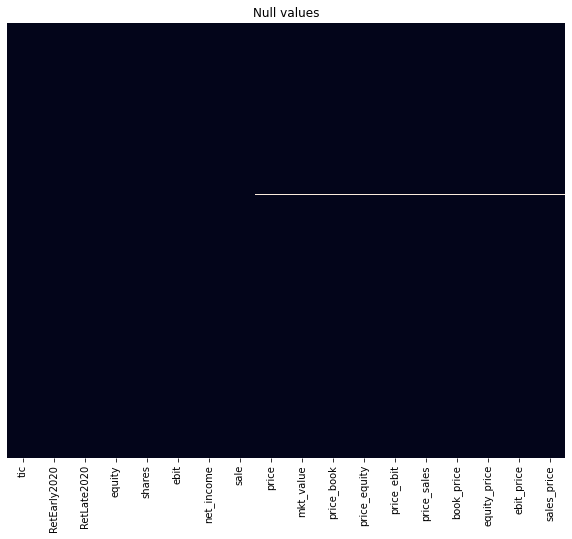

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Null values")
sns.heatmap(stock.isnull(),yticklabels=False,cbar=False)
plt.show()

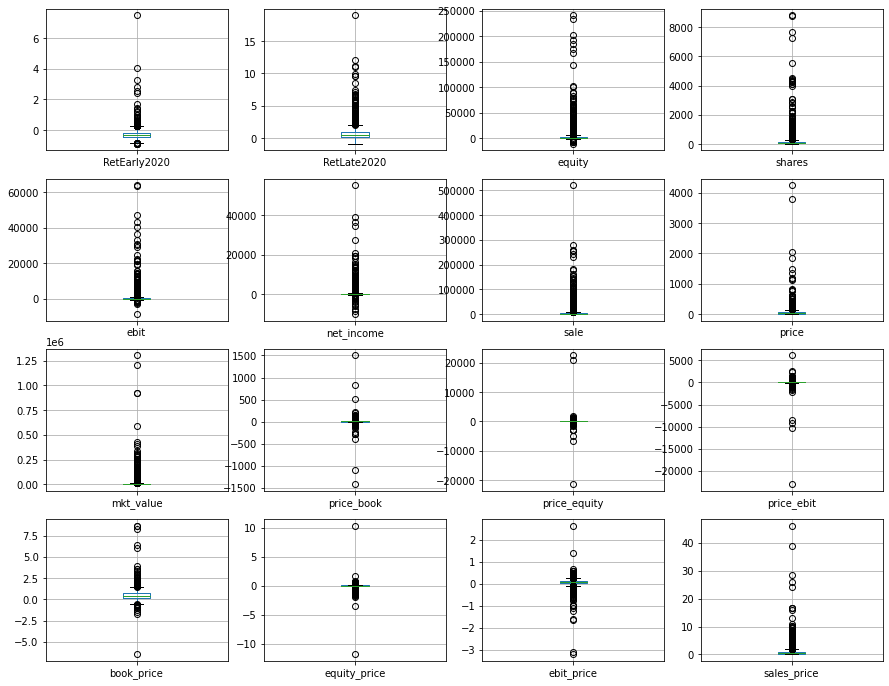

In [ ]:
# infinity and nonnumeric values not able to be plotted 
numeric_col = list(stock.drop(["price_sales"],axis =1).describe(include=[np.number]).columns)  
stock_numeric = stock[numeric_col]
fig, axes = plt.subplots(len(numeric_col)//4, 4, figsize=(15, 12))
i = 0
for triaxis in axes:
    for axis in triaxis:
        stock_numeric.boxplot(column = numeric_col[i], ax=axis)
        i = i+1

# Data Processing

Handling missing values, outliers, data errors, and winsorizing metrics

## Removing Nulls

In [ ]:
nulls = stock.isnull().sum().sort_values(ascending=False).to_frame()
# nulls = nulls[nulls[0] != 0]
nulls.rename(columns={0: "Nulls"}, inplace=True)
nulls.T

,sales_price,price_equity,ebit_price,mkt_value,price_book,price,price_ebit,price_sales,book_price,equity_price,shares,sale,net_income,ebit,equity,RetLate2020,RetEarly2020,tic
Nulls,5,5,5,5,5,5,5,5,5,5,3,2,2,2,2,0,0,0


In [ ]:
# Drops NA
stock.dropna(axis=0, inplace =True)

In [ ]:
nulls = stock.isnull().sum().sort_values(ascending=False).to_frame()
# nulls = nulls[nulls[0] != 0]
nulls.rename(columns={0: "Nulls"}, inplace=True)
nulls.T

,sales_price,ebit_price,RetEarly2020,RetLate2020,equity,shares,ebit,net_income,sale,price,mkt_value,price_book,price_equity,price_ebit,price_sales,book_price,equity_price,tic
Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Winsorizing Data

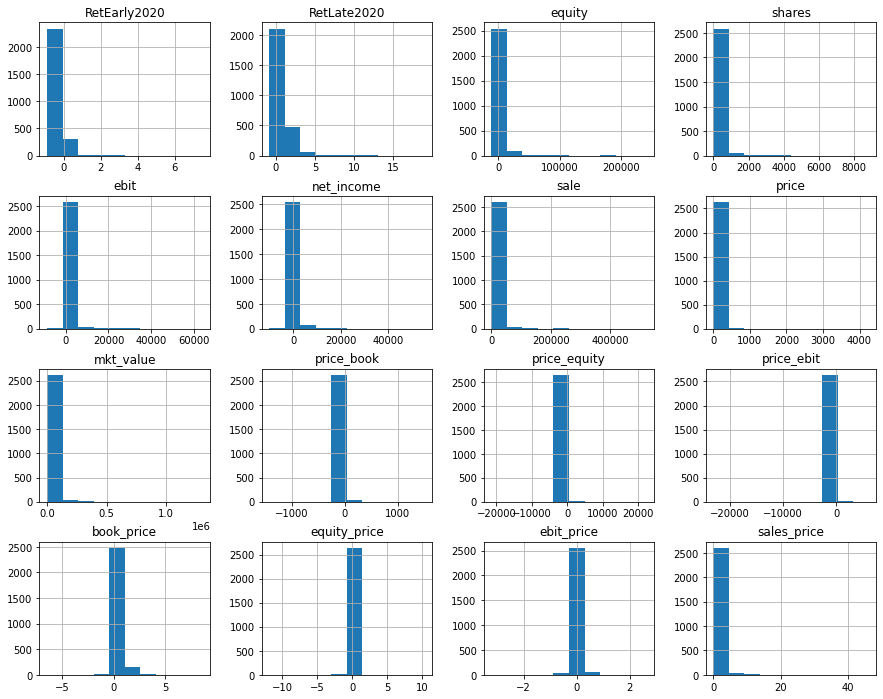

In [ ]:
# infinity and nonnumeric values not able to be plotted 
numeric_col = list(stock.drop(["price_sales"],axis =1).describe(include=[np.number]).columns)  
stock_numeric = stock[numeric_col]
fig, axes = plt.subplots(len(numeric_col)//4, 4, figsize=(15, 12))
i = 0
for triaxis in axes:
    for axis in triaxis:
        stock_numeric.hist(column = numeric_col[i], ax=axis)
        i = i+1

In [ ]:
def mstats_winsorize(s):

    return mstats.winsorize(s, limits=[0.01, 0.035])

def winsorize(df):

    temp = df.copy()

    return temp.apply(mstats_winsorize, axis=0)

winsor = winsorize(stock)

winsor = winsor[['tic','price_book','price_equity', 'price_ebit', 'price_sales', 'book_price',
       'equity_price', 'ebit_price', 'sales_price']]

stock_win = stock[['tic', 'RetEarly2020', 'RetLate2020', 'equity', 'shares', 'ebit',
       'net_income', 'sale', 'price', 'mkt_value']]

stock_win = pd.merge(stock_win, winsor, on="tic", how="inner")

stock_win.describe().T

,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2683.0,-0.285580,0.303794,-0.898188,-0.429834,-0.305207,-0.156336,7.512067e+00
RetLate2020,2683.0,0.794740,1.044686,-0.858458,0.263693,0.570835,0.969696,1.899385e+01
equity,2683.0,3493.081827,12699.044626,-11577.000000,203.145000,665.794000,2180.231500,2.414090e+05
shares,2683.0,168.303326,472.583262,0.621000,29.457000,56.806000,137.830000,8.836149e+03
ebit,2683.0,763.794945,2962.134559,-8596.000000,21.321500,107.305000,459.342000,6.319700e+04
net_income,2683.0,460.241208,2064.669466,-10137.000000,-4.571500,48.458000,258.937000,3.924000e+04
sale,2683.0,5369.665249,17558.877078,0.000000,222.179500,929.704000,3448.118500,2.805220e+05
price,2683.0,65.044852,147.858391,0.249000,17.520000,37.130000,77.605000,4.250550e+03
mkt_value,2683.0,11649.303369,46641.558106,5.017848,701.421610,2222.906880,6587.085240,1.205301e+06
price_book,2683.0,3.481399,6.275385,-31.367242,1.320460,2.341105,4.693941,2.054411e+01


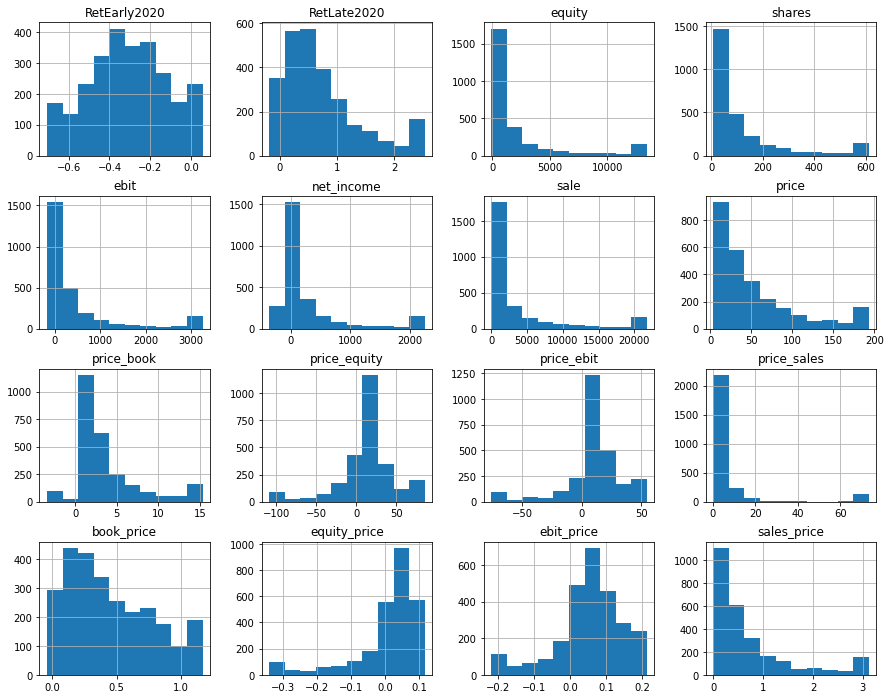

In [ ]:
# dropped mkt value to fit price_sale
numeric_col = list(test.drop(["mkt_value"], axis= 1).describe(include=[np.number]).columns)  
test_numeric = test[numeric_col]

fig, axes = plt.subplots(len(numeric_col)//4, 4, figsize=(15, 12))

i = 0
# print(len(axes))
for triaxis in axes:
    for axis in triaxis:
        test_numeric.hist(column = numeric_col[i], ax=axis)
        i = i+1

# Saving "assign3.csv"


In [ ]:
assgin3 = stock_win[['tic', 'book_price','equity_price', 'ebit_price', 'sales_price', 'RetEarly2020', 'RetLate2020' ]]

In [ ]:
assgin3.to_csv(r'assign3.csv', index = False, header=True)

# Correlation Matrix between Ratios and Returns

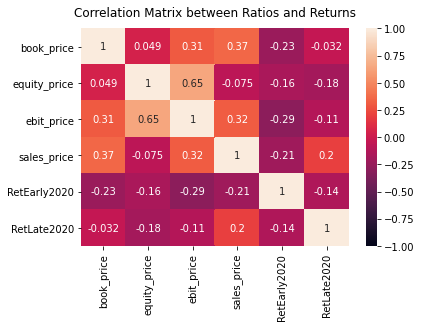

In [ ]:
corr_matrix = sns.heatmap(assgin3.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
corr_matrix.set_title('Correlation Matrix between Ratios and Returns', fontdict={'fontsize':12}, pad=12);
# plt.figsize=(15, 12)


# Most highly correlate variables

## price/ebit and price/equity ( 65% ) 
This makes sense because on the balacne sheet EBIT is close to earnings which goes into net earnings which goes into equity

## price/sales and price/book ( 37% )
This makes sense because on the balacne sheet sales is assoicated with top line growth and can result in a higher book value


## price/ebit and price/book  ( 31% ) 
This makes sense because ebit and ebitda are good metric for valuation

# Least highly correlate variables

## RetEarly2020 and  price/ebit ( -29% )
This makes sense, RetEarly2020 had negative corelations with all metrics and price/ebit seemed to be one of the more powerful metrics 

## RetEarly2020 and  price/book ( -23% )
This makes sense, RetEarly2020 had negative corelations with all metrics and price/book seemed to be one of the more powerful metrics 

# Connection: price/equity -> price/ebit -> price/book -> price/sales

# Linear Models

## RetEarly2020

### Model : RetEarly2020 = a + b1*P/Book + e


In [ ]:
# Dependent Variables
X = assgin3[['book_price']]
X = sm.add_constant(X)

# Independent Variables
Y = assgin3[['RetEarly2020']]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetEarly2020 = a + b1*P/Book + e"))

                       RetEarly2020 = a + b1*P/Book + e                       
Dep. Variable:           RetEarly2020   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     147.2
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           5.01e-33
Time:                        20:43:09   Log-Likelihood:                -538.24
No. Observations:                2683   AIC:                             1080.
Df Residuals:                    2681   BIC:                             1092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1969      0.009    -21.226      0.0

### Model : RetEarly2020 = a + b2*P/E + e


In [ ]:
# Dependent Variables
X = assgin3[['equity_price']]
X = sm.add_constant(X)

# Independent Variables
Y = assgin3[['RetEarly2020']]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetEarly2020 = a + b2*P/E + e"))

                        RetEarly2020 = a + b2*P/E + e                         
Dep. Variable:           RetEarly2020   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     71.27
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           5.03e-17
Time:                        20:41:23   Log-Likelihood:                -574.78
No. Observations:                2683   AIC:                             1154.
Df Residuals:                    2681   BIC:                             1165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2851      0.006    -49.233   

### Model : RetEarly2020 = a + b3*P/EBIT + e

In [ ]:
# Dependent Variables
X = assgin3[['ebit_price']]
X = sm.add_constant(X)

# Independent Variables
Y = assgin3[['RetEarly2020']]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetEarly2020 = a + b3*P/EBIT + e"))

                       RetEarly2020 = a + b3*P/EBIT + e                       
Dep. Variable:           RetEarly2020   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     245.1
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           6.27e-53
Time:                        20:41:23   Log-Likelihood:                -492.62
No. Observations:                2683   AIC:                             989.2
Df Residuals:                    2681   BIC:                             1001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2439      0.006    -39.250      0.0

### Model : RetEarly2020 = a + b4*P/SALES + e

In [ ]:
# Dependent Variables
X = assgin3[['sales_price']]
X = sm.add_constant(X)

# Independent Variables
Y = assgin3[['RetEarly2020' ]]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetEarly2020 = a + b4*P/SALES + e"))

                      RetEarly2020 = a + b4*P/SALES + e                       
Dep. Variable:           RetEarly2020   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     122.0
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           8.92e-28
Time:                        20:41:23   Log-Likelihood:                -550.26
No. Observations:                2683   AIC:                             1105.
Df Residuals:                    2681   BIC:                             1116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2338      0.007    -31.552      

### Summary

**RetEarly2020 v Price/Book**
- The contsant was a -0.1969 with a standard error of 0.009
- The coefficeint was a -0.1938 with a standard error of 0.016
- The R^2 and Adj R^2 were respecively 0.052 and 0.052

**RetEarly2020 v Price/Equity**
- The contsant was a -0.2851 with a standard error of 0.006
- The coefficeint was a -0.3903 with a standard error of 0.046
- The R^2 and Adj R^2 were respecively 0.026 and 0.026

**RetEarly2020 v Price/EBIT**
- The contsant was a -0.2439 with a standard error of 0.006
- The coefficeint was a -0.8138 with a standard error of 0.052
- The R^2 and Adj R^2 were respecively 0.084 and 0.083

**RetEarly2020 v Price/Sales**
- The contsant was a -0.2338 with a standard error of 0.006
- The coefficeint was a -0.0698 with a standard error of 0.052
- The R^2 and Adj R^2 were respecively 0.044 and 0.044

**Comparison**
- All coefficeints and constant were all statistically significant at the 97.5% level
- All coefficeints and constant were negative because RetEarly2020 were most likely filled with negatives
- All the ratios had low R^2 and Adj R^2 meaning they didn't have much predicitve power
- Although Price/EBIT had the highest predicive power with an Adj R^2 of 0.083
- Price/EBIT also had the largest coefficeint with -0.8138


## RetLate2020

### Model : RetLate2020 = a + b1*P/Book + e

In [ ]:
# Dependent Variables
X = assgin3[['book_price']]
X = sm.add_constant(X)

# Independent Variables
Y = assgin3[['RetLate2020' ]]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetLate2020 = a + b1*P/Book + e"))

                       RetLate2020 = a + b1*P/Book + e                        
Dep. Variable:            RetLate2020   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.759
Date:                Thu, 24 Jun 2021   Prob (F-statistic):             0.0968
Time:                        20:41:23   Log-Likelihood:                -3922.4
No. Observations:                2683   AIC:                             7849.
Df Residuals:                    2681   BIC:                             7861.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8376      0.033     25.580      0.0

### Model : RetLate2020 = a + b2*P/E + e


In [ ]:
# Dependent Variables
X = assgin3[['equity_price']]
X = sm.add_constant(X)

# Independent Variables
Y = assgin3[['RetLate2020' ]]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetLate2020 = a + b2*P/E + e"))

                         RetLate2020 = a + b2*P/E + e                         
Dep. Variable:            RetLate2020   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     92.67
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           1.37e-21
Time:                        20:41:23   Log-Likelihood:                -3878.2
No. Observations:                2683   AIC:                             7760.
Df Residuals:                    2681   BIC:                             7772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7968      0.020     40.173   

### Model : RetLate2020 = a + b3*P/EBIT + e


In [ ]:
# Dependent Variables
X = assgin3[[ 'ebit_price']]
X = sm.add_constant(X)

# Independent Variables
Y = assgin3[['RetLate2020' ]]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetLate2020 = a + b3*P/EBIT + e"))

                       RetLate2020 = a + b3*P/EBIT + e                        
Dep. Variable:            RetLate2020   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     32.75
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           1.16e-08
Time:                        20:41:23   Log-Likelihood:                -3907.5
No. Observations:                2683   AIC:                             7819.
Df Residuals:                    2681   BIC:                             7831.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8491      0.022     38.268      0.0

### Model : RetLate2020 = a + b4*P/SALES + e

In [ ]:
# Dependent Variables
X = assgin3[['sales_price']]
X = sm.add_constant(X)

# Independent Variables
Y = assgin3[['RetLate2020' ]]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetLate2020 = a + b4*P/SALES + e"))

                       RetLate2020 = a + b4*P/SALES + e                       
Dep. Variable:            RetLate2020   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     111.9
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           1.22e-25
Time:                        20:41:24   Log-Likelihood:                -3869.0
No. Observations:                2683   AIC:                             7742.
Df Residuals:                    2681   BIC:                             7754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6239      0.026     24.441      

### Summary


**RetEarly2020 v Price/Book**
- The contsant was a 0.8376 with a standard error of 0.033
- The coefficeint was a -0.0937 with a standard error of 0.056
- The R^2 and Adj R^2 were respecively 0.001 and 0.001

**RetEarly2020 v Price/Equity**
- The contsant was a 0.7968 with a standard error of 0.020
- The coefficeint was a -1.5247 with a standard error of 0.158
- The R^2 and Adj R^2 were respecively 0.033 and 0.33

**RetEarly2020 v Price/EBIT**
- The contsant was a 0.8491 with a standard error of 0.022
- The coefficeint was a -1.0623 with a standard error of 0.186
- The R^2 and Adj R^2 were respecively 0.012 and 0.012

**RetEarly2020 v Price/Sales**
- The contsant was a 0.6239 with a standard error of 0.026
- The coefficeint was a 0.2304 with a standard error of 0.022
- The R^2 and Adj R^2 were respecively 0.040 and 0.040

**Comparison**
- All constant were positive and statistically significant at the 97.5% level. This is a sign that the the average returns were better later in 2020 than earlier
- Except for Price/Book, all coefficeints were statistically significant at the 97.5% level
- Except for Price/Sales, all coefficeints were negative which makes sense because although some stock thrived not many had positve returns.
- All the ratios had low R^2 and Adj R^2 meaning they didn't have much predicitve power
- Although Price/Sales had the highest predicive power with an Adj R^2 of 0.040. This makes sense because generating anytime of sales during the pandemic economic depression was a good sign. Which could be why Price/Sales was the only positve coefficeint
- Price/Equity had the largest coefficeint with -1.5247


# Conclusion


## Summary


**Both**
- All 8 equation had very low Adj R^2. Low predicitve power could be due to unprecedented times due to the pandemic
- All 8 except Price/Book for RetLate2020 were statistically significant at the 97.5% level. 


**RetEarly2020**
- All constant were positive and statistically significant at the 97.5% level. This is a sign that the the average returns were better later in 2020 than earlier
- Price/EBIT had strong predicitve power with an Adj R^2 of 0.083 and strong effect with a coefficeint with -0.8138 RetEarly2020



**RetLate2020**
- Adjusted R^2 tended to be lower than RetEarly2020 probably due to the fact some firms were bouncing back while other sinking deeper.
- Price/Sales was the only positve coefficeint and had the highest predicive power with an Adj R^2 of 0.040. This makes sense because generating anytime of sales during the pandemic economic depression was a good sign

*Disclaimer: Sorry for spelling mistakes. Dsylexic and there's no autocorect*